In [81]:
from scipy.constants import epsilon_0
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# Setup:

Sphere in a wholespace with a constant, uniform electric field

Parameters:

 - sigma_0 : conductivity of the background
 - sigma_1 : conductivity of the sphere

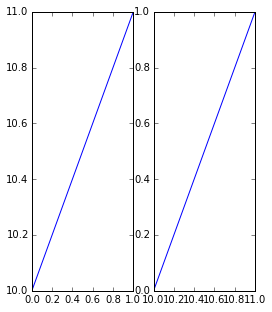

In [82]:
# Make a plot 

x = np.linspace(0,1,50)
m = 1
b = 10
y = m*x + b

fig,ax = plt.subplots(1,2,figsize=(4,5))
ax[0].plot(x,y)

ax[1].plot(y,x)

In [83]:
# Parameters for the sphere

sig0 = 1e-1        # conductivity of the wholespace
sig1 = 2           # conductivity of the sphere
R    = 50          # radius of the sphere
E0   = 1           # inducing field strength
# d    = 2           # mesh spacing

In [84]:
r  = lambda x,y,z: np.sqrt(x**2+y**2+z**2)

In [85]:
# assumes an x-oriented inducing field
# and that the sphere is at the origin
def get_Potential(XYZ,sig0,sig1,R,E0): 
    
    x,y,z = XYZ[:,0],XYZ[:,1],XYZ[:,2]
    
    sigf = (sig1-sig0)/(sig1+2.*sig0)
    
    r_cur = r(x,y,z)
    
    ind0 = (r_cur > R)
    ind1 = (r_cur <= R)
    
    assert (ind0 + ind1).all(), 'Some indicies not included'
    
    V = np.zeros_like(x)
    
    V[ind0] = -E0*x[ind0]*(1.-sigf*R**3./r_cur[ind0]**3) # outside the sphere
    V[ind1] = -E0*x[ind1]*3.*sig0/(sig1+2.*sig0)
    
    return V

In [86]:
def get_Primary_Potential(XYZ,sig0,sig1,R,E0):
    x = XYZ[:,0]
    return - E0*x

In [87]:
from SimPEG.Utils import ndgrid

In [88]:
xr = np.linspace(-2.*R, 2.*R, 100)
yr = xr.copy()
zr = np.r_[0] # identical to saying `zr = np.array([0])`

XYZ = ndgrid(xr,yr,zr)

(10000,)


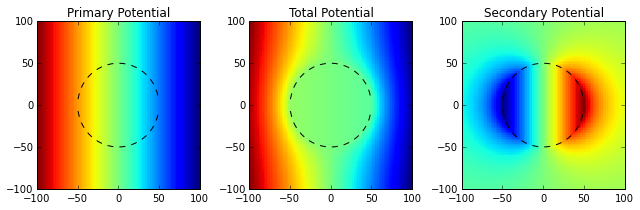

In [89]:
V = get_Potential(XYZ,sig0,sig1,R,E0)
Vp = get_Primary_Potential(XYZ,sig0,sig1,R,E0)
print V.shape

xcirc = xr[np.abs(xr) <= R]

fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].pcolor(xr,yr,Vp.reshape(xr.size,yr.size))
ax[0].plot(xcirc,np.sqrt(R**2-xcirc**2),'--k',xcirc,-np.sqrt(R**2-xcirc**2),'--k')
ax[0].set_title('Primary Potential')

ax[1].pcolor(xr,yr,V.reshape(xr.size,yr.size))
ax[1].plot(xcirc,np.sqrt(R**2-xcirc**2),'--k',xcirc,-np.sqrt(R**2-xcirc**2),'--k')
ax[1].set_title('Total Potential')

ax[2].pcolor(xr,yr,(V-Vp).reshape(xr.size,yr.size))
ax[2].plot(xcirc,np.sqrt(R**2-xcirc**2),'--k',xcirc,-np.sqrt(R**2-xcirc**2),'--k')
ax[2].set_title('Secondary Potential')

plt.tight_layout()

In [90]:
print 1/3   # integer division
print 1./3. # floats 

0
0.333333333333


In [91]:
from ipywidgets import *

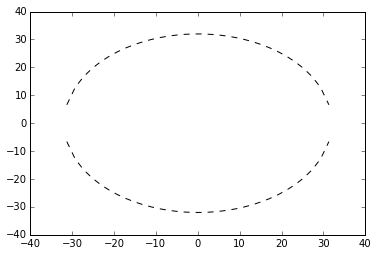

None

In [92]:
R_slider = FloatSlider(min=1., max =50., step=1.)

def plot_Circle(R):
    xcirc = xr[np.abs(xr) <= R]
    plt.plot(xcirc,np.sqrt(R**2-xcirc**2),'--k',xcirc,-np.sqrt(R**2-xcirc**2),'--k')
    plt.show()
    
interactive(plot_Circle,R = R_slider)
